In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
from data import MePicsSet
from display import show_keypoints
import torch
from torch.utils.data import DataLoader
from learn import test
import numpy as np
import morph, utils
from pathlib import Path
import my_types as mt

In [28]:
OUT_DIR = Path("output")

In [29]:
april_dataset = MePicsSet()
april_loader = DataLoader(april_dataset, batch_size=8, shuffle=False)

In [30]:
april_dataset.samples[0].get_crop_box()

(810, 54, 287, 287)

In [31]:
april_dataset.samples[0].get_cropped_img()

array([[[0.17647059, 0.18039216, 0.2       ],
        [0.22352941, 0.22745098, 0.24705882],
        [0.23921569, 0.24313725, 0.2627451 ],
        ...,
        [0.72941176, 0.61176471, 0.4       ],
        [0.7254902 , 0.60784314, 0.39607843],
        [0.7254902 , 0.60784314, 0.39607843]],

       [[0.18039216, 0.17647059, 0.19607843],
        [0.22745098, 0.23137255, 0.25098039],
        [0.2745098 , 0.27843137, 0.29803922],
        ...,
        [0.7254902 , 0.60784314, 0.39607843],
        [0.7254902 , 0.60784314, 0.39607843],
        [0.72156863, 0.60392157, 0.39215686]],

       [[0.18431373, 0.18039216, 0.2       ],
        [0.22745098, 0.23137255, 0.24705882],
        [0.28235294, 0.28627451, 0.30588235],
        ...,
        [0.7254902 , 0.60784314, 0.39607843],
        [0.72156863, 0.60392157, 0.39215686],
        [0.72156863, 0.60392157, 0.39215686]],

       ...,

       [[0.02352941, 0.06666667, 0.09019608],
        [0.02745098, 0.0627451 , 0.09019608],
        [0.01960784, 0

In [32]:
model3_path = max(OUT_DIR.glob("model3*"), key=lambda p: Path(p).stat().st_mtime)
model3 = torch.load(model3_path, map_location="cpu")
print(f"loaded {model3_path}")

loaded output/model3.pt


In [33]:
april_imgs, april_preds = test(april_loader, model3)

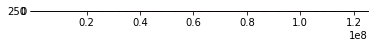

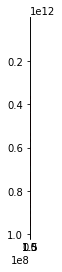

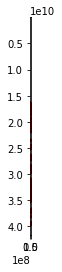

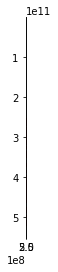

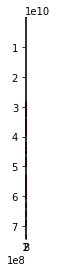

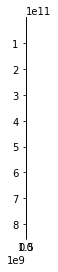

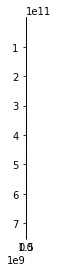

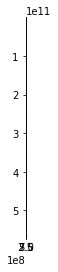

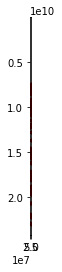

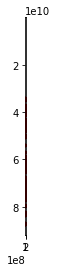

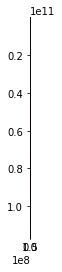

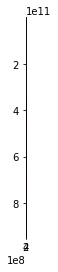

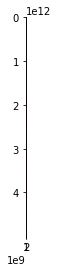

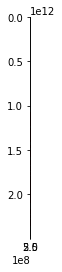

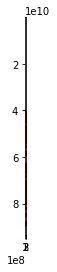

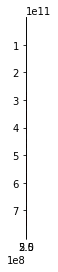

In [83]:
for i, p in zip(april_imgs, april_preds):
    show_keypoints(image=i, truth_points=None, pred_points=p)

In [74]:
april_preds[0]

tensor([[8.0069e+04, 9.4703e-01],
        [8.3022e+04, 1.0266e+00],
        [9.5045e+04, 1.1052e+00],
        [1.1447e+05, 1.1909e+00],
        [1.4160e+05, 1.2728e+00],
        [1.8610e+05, 1.3279e+00],
        [2.3157e+05, 1.3704e+00],
        [2.8124e+05, 1.4160e+00],
        [3.3141e+05, 1.4180e+00],
        [3.8220e+05, 1.4010e+00],
        [4.3249e+05, 1.3565e+00],
        [4.7107e+05, 1.2927e+00],
        [5.0455e+05, 1.2244e+00],
        [5.2443e+05, 1.1374e+00],
        [5.3264e+05, 1.0517e+00],
        [5.3322e+05, 9.5442e-01],
        [5.3018e+05, 8.6409e-01],
        [1.1281e+05, 8.2737e-01],
        [1.3017e+05, 8.0142e-01],
        [1.6677e+05, 7.6386e-01],
        [2.0111e+05, 7.8833e-01],
        [2.5225e+05, 7.9055e-01],
        [3.1526e+05, 8.0233e-01],
        [3.6152e+05, 7.6533e-01],
        [4.0912e+05, 7.4036e-01],
        [4.4463e+05, 7.5273e-01],
        [4.8501e+05, 7.9287e-01],
        [2.9494e+05, 8.7478e-01],
        [3.0613e+05, 9.2932e-01],
        [2.923

In [73]:
for i in range(len(april_dataset)):
    im = april_dataset.get_original_img(i)
    h, w, _ = im.shape
    r = mt.to_ratios(april_preds[i], h, w)
    mt.assert_points(r)
    p = april_dataset.get_original_pts(i, r)
    show_keypoints(image=im, truth_points=None, pred_points=p)

tensor(533218.7500, device='cuda:0') tensor(80069.1406, device='cuda:0')


AssertionError: points are not ratios 533218.75, 1.4180290699005127

In [48]:
import data, my_types
import my_types as mt

morph_imgs = []
morph_pts = []
corners = np.array([[0, 0], [0, 499/500], [499/500, 0], [499/500, 499/500]])
# for i in range(len(april_dataset)):
for i in [0, 1]:
    im = mt.to_img_arr(april_dataset.get_morph_img(i))
    morph_imgs.append(im)

    pred_pts = mt.to_points(april_preds[i])
    pts = april_dataset.get_morph_pts(i, pred_pts)
    # pts = np.vstack((pred_pts, corners))
#     my_types.assert_points(pts)
    morph_pts.append(pts)
    
    print(im.shape)
    show_keypoints(im, pts, color=True)


middle, _, _ = morph.compute_middle_object(
    morph_imgs[0], morph_imgs[1], morph_pts[0], morph_pts[1], alpha=0.5
)
plt.imshow(middle)

AssertionError: points are not ratios 1.5451016426086426, 5.947823524475098

In [ ]:
filename = OUT_DIR / f"morph_{time.time()}.mp4"

me1, me2 = morph_imgs[0], morph_imgs[1]
pts1, pts2 = morph_pts[0], morph_pts[1]
# morph.compute_middle_object(me1, me2, pts1, pts2, alpha=0.5)
# morph.compute_morph_video(me1, me2, pts1, pts2, filename)